In [73]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import achiralqw as aqw

from achiralqw.graph import QWGraph, QWGraphBuilder as qwgb
from achiralqw.plotter import plot_qwgraph
from achiralqw.collection import CachedQWGraphCollection

from achiralqw.article import * 
from setup_cache import load_P_cache, load_C3_cache, load_C4_cache, load_DiC_cache, load_C_odd_cache, load_C_even_cache

cb = CollectionBuilder()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
bounds = (500,1500)

select = CollectionBuilder.log_selection(bounds, points = 20)
select_c4 = [s//2 for s in select]

In [ ]:
# in the following code the asymptotics behaviour of 4 family of graphs is assessed
# morover the scaling behaviour is fitted against various expantion of a polynomial model derived from Banchi et Al.
# https://arxiv.org/abs/1105.6058

# NOTE:
#   the execution of all cells requires a quite heavy computation and might take some time

## Path asymptotics

In [96]:
#Asymptotics model for Path

#pmodel_collection = cb.log_progression("P", bounds = bounds, points = 50, tp = tp)
pmodel_collection = load_P_cache()

poly_params = pmodel_collection.transport_prob_model(select = select) 
pmodel_collection.offload()

######### Transpor prob model:  poly
ax^2:  -0.00912406802981624
bx:  -0.5158507999682058
c:  1.3432747613564253


In [97]:
custom_params = pmodel_collection.transport_prob_model(select = select, mode = "banchi4log")
b1_pparams = pmodel_collection.transport_prob_model(select = select, mode = "banchi1") 
pmodel_collection.transport_prob_model(select = select, mode = "banchi2") 
x, pdata = pmodel_collection.evaluate(select = select)

pmodel_collection.offload()

######### Transpor prob model:  banchi4log
a*x^-2/3:  7.28829905287448  +-  2.2545711665899937e-10
b*x^-4/3:  -26.537761587480173  +-  1.6258281086096967e-05
c*x^-2:  28.005556064757677  +-  0.12377825156955209
d*x^-8/3:  481.29391463646095  +-  99.80096037832473
######### Transpor prob model:  banchi1
a*x^-2/3:  6.965123091984333  +-  inf
######### Transpor prob model:  banchi2
a*x^-2/3:  7.282738011851029  +-  9.210989561369473e-08
b*x^-4/3:  -25.645818029660774  +-  0.0005777571290621576


/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.1308922333738876
1.1130561498177214


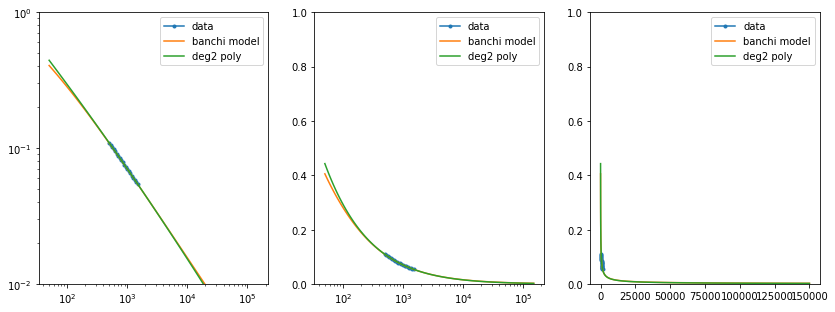

In [98]:
fig, axx = plt.subplots(1,3, figsize = (14,5))

axx[0].plot(x,pdata, marker = ".", label = "data")
axx[1].plot(x,pdata, marker = ".", label = "data")
axx[2].plot(x,pdata, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/10, bounds[1]*100, 100)

def custom_model(x,a,b,c,d ):
    return a*np.power(x+3, -2/3) + b*np.power(x+3, -4/3) + c*np.power(x+3, -2.0) + d*np.power(x+3, -8/3)

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "banchi model")
axx[1].plot(sample, custom_data, label = "banchi model")
axx[2].plot(sample, custom_data, label = "banchi model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")
axx[2].plot(sample, poly_data, label = "deg2 poly")


axx[0].legend()
axx[1].legend()
axx[2].legend()



# C Asymptotics

In [99]:
#Asymptotics model for odd and even C graphs

codd_model_collection = load_C_odd_cache()
ceven_model_collection = load_C_even_cache()

odd_params = codd_model_collection.transport_prob_model(select = select)
even_params = ceven_model_collection.transport_prob_model(select = select)

codd_model_collection.offload()
ceven_model_collection.offload()

######### Transpor prob model:  poly
ax^2:  -0.001961113485154845
bx:  -0.6343732873654838
c:  -0.23034317979932364
######### Transpor prob model:  poly
ax^2:  -0.0007963898591493537
bx:  -0.6534900565461786
c:  0.5436227113055133


In [100]:
custom_params_codd = codd_model_collection.transport_prob_model(select = select, mode = "banchi4log")
b1_coddparams = codd_model_collection.transport_prob_model(select = select, mode = "banchi1") 
codd_model_collection.transport_prob_model(select = select, mode = "banchi2") 

custom_params_ceven = ceven_model_collection.transport_prob_model(select = select, mode = "banchi4log")
b1_cevenparams = ceven_model_collection.transport_prob_model(select = select, mode = "banchi1") 
ceven_model_collection.transport_prob_model(select = select, mode = "banchi2") 

codd_model_collection.offload()
ceven_model_collection.offload()

######### Transpor prob model:  banchi4log
a*x^-2/3:  0.9109625045096013  +-  1.8044307127676398e-13
b*x^-4/3:  -0.6812431326027305  +-  1.2999979546424818e-08
c*x^-2:  -1.0592292456010917  +-  9.90615214029589e-05
d*x^-8/3:  16.41481939708423  +-  0.08004994530945064
######### Transpor prob model:  banchi1
a*x^-2/3:  0.9024009401994215  +-  inf
######### Transpor prob model:  banchi2
a*x^-2/3:  0.9110538785195512  +-  9.89030700057972e-12
b*x^-4/3:  -0.6994448588675662  +-  6.217744623408856e-08
######### Transpor prob model:  banchi4log
a*x^-2/3:  1.8218802078294527  +-  2.184380693236981e-15
b*x^-4/3:  -0.5894532751998492  +-  1.181680358457063e-10
c*x^-2:  0.16915074704731747  +-  6.708751485427759e-07
d*x^-8/3:  -0.47448186548948545  +-  0.0004442636926944505
######### Transpor prob model:  banchi1
a*x^-2/3:  1.8146138956761433  +-  inf
######### Transpor prob model:  banchi2
a*x^-2/3:  1.821858269605822  +-  1.0358604928400394e-12
b*x^-4/3:  -0.5855860649775311  +-  6.51215092078

/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.1308922333738876
1.1130561498177214


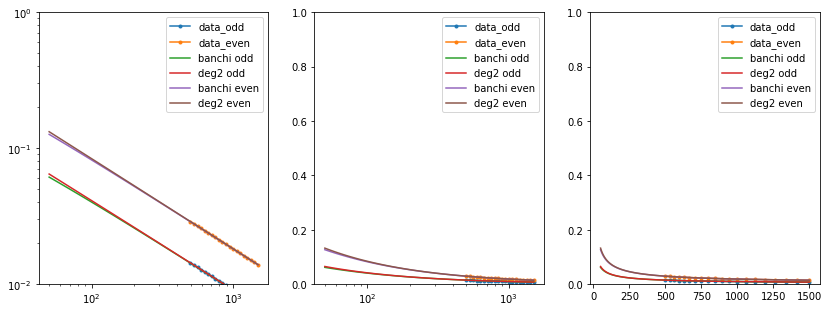

In [101]:
fig, axx = plt.subplots(1,3, figsize = (14,5))

x, data = codd_model_collection.evaluate(select = select)
axx[0].plot(x,data, marker = ".", label = "data_odd")
axx[1].plot(x,data, marker = ".", label = "data_odd")
axx[2].plot(x,data, marker = ".", label = "data_odd")

x, data = ceven_model_collection.evaluate(select = select)
axx[0].plot(x,data, marker = ".", label = "data_even")
axx[1].plot(x,data, marker = ".", label = "data_even")
axx[2].plot(x,data, marker = ".", label = "data_even")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/10, bounds[1], 100)

def custom_model(x,a,b,c,d ):
    return a*np.power(x+3, -2/3) + b*np.power(x+3, -4/3) + c*np.power(x+3, -2.0) + d*np.power(x+3, -8/3)

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params_codd) for x in sample]
axx[0].plot(sample, custom_data, label = "banchi odd")
axx[1].plot(sample, custom_data, label = "banchi odd")
axx[2].plot(sample, custom_data, label = "banchi odd")

poly_data = [poly_model(x, *odd_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 odd")
axx[1].plot(sample, poly_data, label = "deg2 odd")
axx[2].plot(sample, poly_data, label = "deg2 odd")

custom_data = [custom_model(x, *custom_params_ceven) for x in sample]
axx[0].plot(sample, custom_data, label = "banchi even")
axx[1].plot(sample, custom_data, label = "banchi even")
axx[2].plot(sample, custom_data, label = "banchi even")

poly_data = [poly_model(x, *even_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 even")
axx[1].plot(sample, poly_data, label = "deg2 even")
axx[2].plot(sample, poly_data, label = "deg2 even")

axx[0].legend()
axx[1].legend()
axx[2].legend()


## C4 asymptotics

In [102]:
#Asymptotics model for Path

#pmodel_collection = cb.log_progression("P", bounds = bounds, points = 50, tp = tp)
c4model_collection = load_C4_cache()

poly_params = c4model_collection.transport_prob_model(select = select_c4) 
c4model_collection.offload()

######### Transpor prob model:  poly
P progression: Starting pool creation with 24 process


100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


C4_chain_first_fast : Starting pool evaluation with 24 process
Data Setup


18it [00:04,  4.11it/s]


Evaluation


100%|██████████| 18/18 [01:18<00:00,  4.39s/it]


ax^2:  -0.033254108554062224
bx:  -0.08183264097565017
c:  0.6977305287328031


In [103]:
custom_params_c4 = c4model_collection.transport_prob_model(select = select_c4, mode = "banchi4log")
b1_c4params = c4model_collection.transport_prob_model(select = select_c4, mode = "banchi1") 
c4model_collection.transport_prob_model(select = select_c4, mode = "banchi4")
c4model_collection.transport_prob_model(select = select_c4, mode = "banchi2") 
c4model_collection.transport_prob_model(select = select_c4, mode = "banchi3") 
x, c4data = c4model_collection.evaluate(select = select_c4)

c4model_collection.offload()

######### Transpor prob model:  banchi4log
a*x^-2/3:  28.891277795526843  +-  3.222340977900391e-05
b*x^-4/3:  -691.6974098046555  +-  2.31302338232209
c*x^-2:  15941.623519503339  +-  17536.344771076045
d*x^-8/3:  -215540.52430342959  +-  14090849.823097168
######### Transpor prob model:  banchi1
a*x^-2/3:  22.42109903630445  +-  inf
######### Transpor prob model:  banchi4
a*x^-2/3:  28.884305465462013  +-  3.448882131040294e-05
b*x^-4/3:  -689.8434516807495  +-  2.3728411152828968
c*x^-2:  15782.034897983858  +-  17282.197288103675
d*x^-8/3:  -211081.3413021864  +-  13380388.680800725
######### Transpor prob model:  banchi2
a*x^-2/3:  27.410857211205915  +-  0.0029975659065394024
b*x^-4/3:  -403.89268456374856  +-  18.89767529181874
######### Transpor prob model:  banchi3
a*x^-2/3:  28.551732443912755  +-  0.00025055724472541695
b*x^-4/3:  -601.650888962202  +-  7.292278500098838
c*x^-2:  8209.90849601339  +-  12460.101608778243


/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


-153.75567943897715
1.3951389474130456


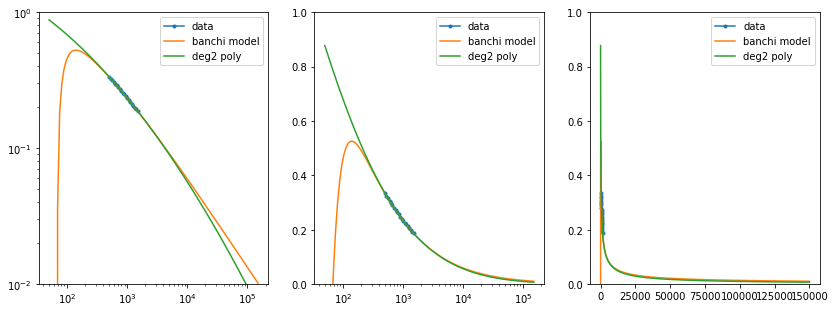

In [104]:
fig, axx = plt.subplots(1,3, figsize = (14,5))

axx[0].plot(x,c4data, marker = ".", label = "data")
axx[1].plot(x,c4data, marker = ".", label = "data")
axx[2].plot(x,c4data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/10, bounds[1]*100, 100)

def custom_model(x,a,b,c,d ):
    return a*np.power(x+3, -2/3) + b*np.power(x+3, -4/3) + c*np.power(x+3, -2.0) + d*np.power(x+3, -8/3)

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params_c4))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params_c4) for x in sample]
axx[0].plot(sample, custom_data, label = "banchi model")
axx[1].plot(sample, custom_data, label = "banchi model")
axx[2].plot(sample, custom_data, label = "banchi model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")
axx[2].plot(sample, poly_data, label = "deg2 poly")


axx[0].legend()
axx[1].legend()
axx[2].legend()


## C3 asymptotics

In [105]:
#Asymptotics model for Path

#pmodel_collection = cb.log_progression("P", bounds = bounds, points = 50, tp = tp)
c3model_collection = load_C3_cache()

poly_params = c3model_collection.transport_prob_model(select = select) 
c3model_collection.offload()

######### Transpor prob model:  poly
ax^2:  -0.030325833517911734
bx:  -0.13594708195327598
c:  0.8071592558004776


In [106]:
custom_params_c3 = c3model_collection.transport_prob_model(select = select, mode = "banchi4")
b1_c3params = c3model_collection.transport_prob_model(select = select, mode = "banchi1")
c3model_collection.transport_prob_model(select = select, mode = "banchi2") 
c3model_collection.transport_prob_model(select = select, mode = "banchi3") 
x, c4data = c3model_collection.evaluate(select = select)

######### Transpor prob model:  banchi4
a*x^-2/3:  24.881984497014034  +-  1.4991282382911572e-05
b*x^-4/3:  -523.5685746336221  +-  1.0333089131505369
c*x^-2:  11145.436435871217  +-  7541.207218973986
d*x^-8/3:  -144619.3266723314  +-  5851335.908952484
######### Transpor prob model:  banchi1
a*x^-2/3:  19.88033430089993  +-  inf
######### Transpor prob model:  banchi2
a*x^-2/3:  23.82763574427354  +-  0.0015679259263059004
b*x^-4/3:  -319.768577899981  +-  9.901720449596452
######### Transpor prob model:  banchi3
a*x^-2/3:  24.654806906862927  +-  0.00011667576322882963
b*x^-4/3:  -463.2706253476228  +-  3.4019801321666887
c*x^-2:  5963.120268813361  +-  5824.120688664149


/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


-101.4571137037153
1.3956287799427214


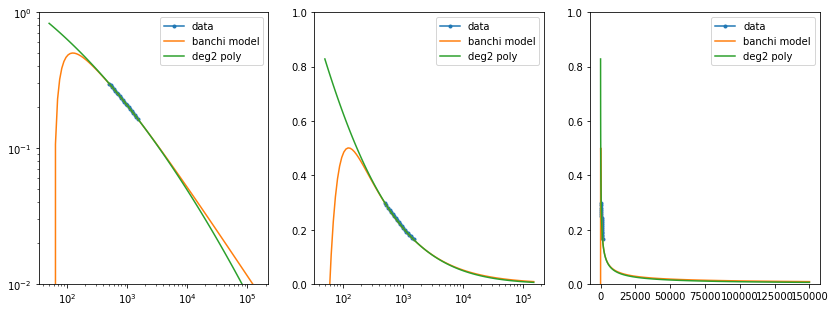

In [107]:
fig, axx = plt.subplots(1,3, figsize = (14,5))

axx[0].plot(x,c4data, marker = ".", label = "data")
axx[1].plot(x,c4data, marker = ".", label = "data")
axx[2].plot(x,c4data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/10, bounds[1]*100, 100)

def custom_model(x,a,b,c,d ):
    return a*np.power(x+3, -2/3) + b*np.power(x+3, -4/3) + c*np.power(x+3, -2.0) + d*np.power(x+3, -8/3)

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params_c3))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params_c3) for x in sample]
axx[0].plot(sample, custom_data, label = "banchi model")
axx[1].plot(sample, custom_data, label = "banchi model")
axx[2].plot(sample, custom_data, label = "banchi model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")
axx[2].plot(sample, poly_data, label = "deg2 poly")


axx[0].legend()
axx[1].legend()
axx[2].legend()


## DiC asymptotics

In [108]:
#Asymptotics model for Path

#pmodel_collection = cb.log_progression("P", bounds = bounds, points = 50, tp = tp)
dicmodel_collection = load_DiC_cache()

poly_params = dicmodel_collection.transport_prob_model(select = select) 
dicmodel_collection.offload()

######### Transpor prob model:  poly
ax^2:  -0.04470479039801015
bx:  0.15629244998205896
c:  0.006580775622866324


In [109]:
custom_params_dic4 = dicmodel_collection.transport_prob_model(select = select, mode = "banchi4")
b1_dic4params = dicmodel_collection.transport_prob_model(select = select, mode = "banchi1") 
dicmodel_collection.transport_prob_model(select = select, mode = "banchi2") 
dicmodel_collection.transport_prob_model(select = select, mode = "banchi3") 
x, dic4data = dicmodel_collection.evaluate(select = select)

dicmodel_collection.offload()

######### Transpor prob model:  banchi4
a*x^-2/3:  50.61356685831341  +-  0.0014677061623768982
b*x^-4/3:  -2131.977465739461  +-  101.16499519784125
c*x^-2:  68880.7002476522  +-  738313.6075401934
d*x^-8/3:  -1084742.7242696336  +-  572868604.1637723
######### Transpor prob model:  banchi1
a*x^-2/3:  32.92694950914758  +-  inf
######### Transpor prob model:  banchi2
a*x^-2/3:  44.74678393244204  +-  0.03984597941808751
b*x^-4/3:  -957.5178635329911  +-  251.6341744680466
######### Transpor prob model:  banchi3
a*x^-2/3:  48.90958107665832  +-  0.006585834075038474
b*x^-4/3:  -1679.7020338334055  +-  192.02683569405414
c*x^-2:  30009.823422283174  +-  328746.069667456


/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


-813.9578516744408
1.1381876280286054


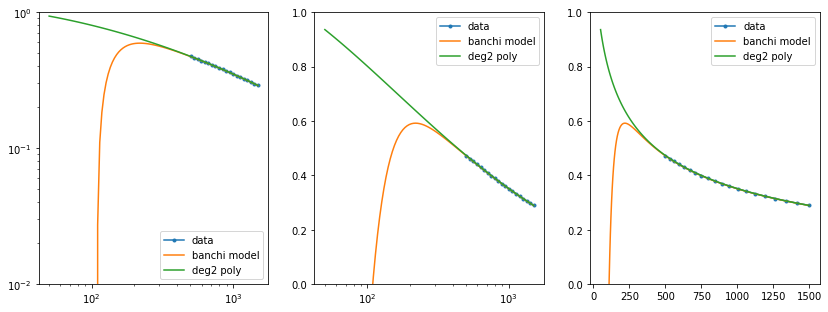

In [110]:
fig, axx = plt.subplots(1,3, figsize = (14,5))

axx[0].plot(x,dic4data, marker = ".", label = "data")
axx[1].plot(x,dic4data, marker = ".", label = "data")
axx[2].plot(x,dic4data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/10, bounds[1], 100)

def custom_model(x,a,b,c,d ):
    return a*np.power(x+3, -2/3) + b*np.power(x+3, -4/3) + c*np.power(x+3, -2.0) + d*np.power(x+3, -8/3)

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params_dic4))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params_dic4) for x in sample]
axx[0].plot(sample, custom_data, label = "banchi model")
axx[1].plot(sample, custom_data, label = "banchi model")
axx[2].plot(sample, custom_data, label = "banchi model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")
axx[2].plot(sample, poly_data, label = "deg2 poly")


axx[0].legend()
axx[1].legend()
axx[2].legend()


## Final Assessment

######### Transpor prob model:  banchi4
a*x^-2/3:  7.288321372848249  +-  2.433030362477501e-10
b*x^-4/3:  -26.54370326086456  +-  1.666643550136147e-05
c*x^-2:  28.517509643791534  +-  0.12084913649432498
d*x^-8/3:  466.97920475110715  +-  93.1439572033353
######### Transpor prob model:  banchi4
a*x^-2/3:  24.881984497014034  +-  1.4991282382911572e-05
b*x^-4/3:  -523.5685746336221  +-  1.0333089131505369
c*x^-2:  11145.436435871217  +-  7541.207218973986
d*x^-8/3:  -144619.3266723314  +-  5851335.908952484
######### Transpor prob model:  banchi4
a*x^-2/3:  28.884305465462013  +-  3.448882131040294e-05
b*x^-4/3:  -689.8434516807495  +-  2.3728411152828968
c*x^-2:  15782.034897983858  +-  17282.197288103675
d*x^-8/3:  -211081.3413021864  +-  13380388.680800725
######### Transpor prob model:  banchi4
a*x^-2/3:  50.61356685831341  +-  0.0014677061623768982
b*x^-4/3:  -2131.977465739461  +-  101.16499519784125
c*x^-2:  68880.7002476522  +-  738313.6075401934
d*x^-8/3:  -1084742.7242696336

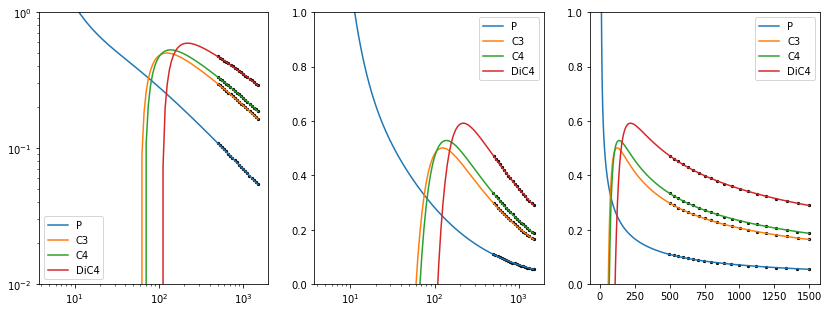

In [111]:
def custom_model(x,a,b,c,d ):
    return a*np.power(x+3, -2/3) + b*np.power(x+3, -4/3) + c*np.power(x+3, -2.0) + d*np.power(x+3, -8/3)


fig, axx = plt.subplots(1,3, figsize = (14,5))

x = [-1]*4
real_data = [-1]*4
x[0], real_data[0] = pmodel_collection.evaluate(select = select)
x[1], real_data[1] = c3model_collection.evaluate(select = select)
x[2], real_data[2] = c4model_collection.evaluate(select = select_c4)
x[3], real_data[3] = dicmodel_collection.evaluate(select = select)

for x, data in zip(x,real_data):
    axx[0].scatter(x,data, color = "black", s = 5)
    axx[1].scatter(x,data, color = "black", s = 5)
    axx[2].scatter(x,data, color = "black", s = 5)

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(5, bounds[1], 100)

param = pmodel_collection.transport_prob_model(select = select, mode = "banchi4") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "P")
axx[1].plot(sample, data, label = "P")
axx[2].plot(sample, data, label = "P")

param = c3model_collection.transport_prob_model(select = select, mode = "banchi4") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "C3")
axx[1].plot(sample, data, label = "C3")
axx[2].plot(sample, data, label = "C3")

param = c4model_collection.transport_prob_model(select = select_c4, mode = "banchi4") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "C4")
axx[1].plot(sample, data, label = "C4")
axx[2].plot(sample, data, label = "C4")

param = dicmodel_collection.transport_prob_model(select = select, mode = "banchi4") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "DiC4")
axx[1].plot(sample, data, label = "DiC4")
axx[2].plot(sample, data, label = "DiC4")

axx[0].legend()
axx[1].legend()
axx[2].legend()


P progression: Starting pool creation with 24 process


100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


C4_chain_first_fast : Starting pool evaluation with 24 process
Data Setup


9it [00:01,  5.81it/s]


Evaluation


100%|██████████| 9/9 [00:19<00:00,  2.18s/it]


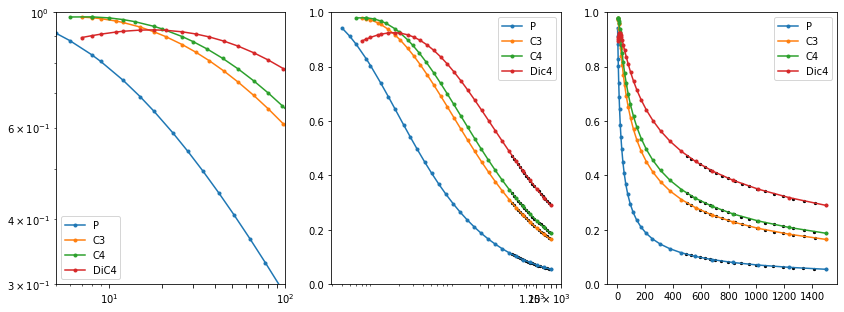

In [112]:
fig, axx = plt.subplots(1,3, figsize = (14,5))

global_select = CollectionBuilder.log_selection((5,bounds[1]), points = 30)
global_c4 = [g//2 for g in global_select]

x = [-1]*4
real_data = [-1]*4
x[0], real_data[0] = pmodel_collection.evaluate(select = select)
x[1], real_data[1] = c3model_collection.evaluate(select = select)
x[2], real_data[2] = c4model_collection.evaluate(select = select_c4)
x[3], real_data[3] = dicmodel_collection.evaluate(select = select)

for x, data in zip(x,real_data):
    axx[0].scatter(x,data, color = "black", s = 5)
    axx[1].scatter(x,data, color = "black", s = 5)
    axx[2].scatter(x,data, color = "black", s = 5)

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.3,1)
axx[0].set_xlim(5,100)
axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/10, bounds[1], 100)

plot_standard_progression(pmodel_collection, select = global_select, label = "P", ax = axx[0])
plot_standard_progression(pmodel_collection, select = global_select, label = "P", ax = axx[1])
plot_standard_progression(pmodel_collection, select = global_select, label = "P", ax = axx[2])

plot_standard_progression(c3model_collection, select = global_select, label = "C3", ax = axx[0])
plot_standard_progression(c3model_collection, select = global_select, label = "C3", ax = axx[1])
plot_standard_progression(c3model_collection, select = global_select, label = "C3", ax = axx[2])

plot_standard_progression(c4model_collection, select = global_c4, label = "C4", ax = axx[0])
plot_standard_progression(c4model_collection, select = global_c4, label = "C4", ax = axx[1])
plot_standard_progression(c4model_collection, select = global_c4, label = "C4", ax = axx[2])

plot_standard_progression(dicmodel_collection, select = global_select, label = "DiC4", ax = axx[0])
plot_standard_progression(dicmodel_collection, select = global_select, label = "Dic4", ax = axx[1])
plot_standard_progression(dicmodel_collection, select = global_select, label = "Dic4", ax = axx[2])

axx[0].legend()
axx[1].legend()
axx[2].legend()

pmodel_collection.offload()
c3model_collection.offload()
c4model_collection.offload()
dicmodel_collection.offload()

# Banchi1 fails

######### Transpor prob model:  banchi1
a*x^-2/3:  6.965123091984333  +-  inf
######### Transpor prob model:  banchi1
a*x^-2/3:  19.88033430089993  +-  inf
######### Transpor prob model:  banchi1
a*x^-2/3:  22.42109903630445  +-  inf
######### Transpor prob model:  banchi1
a*x^-2/3:  32.92694950914758  +-  inf


/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/annoni/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


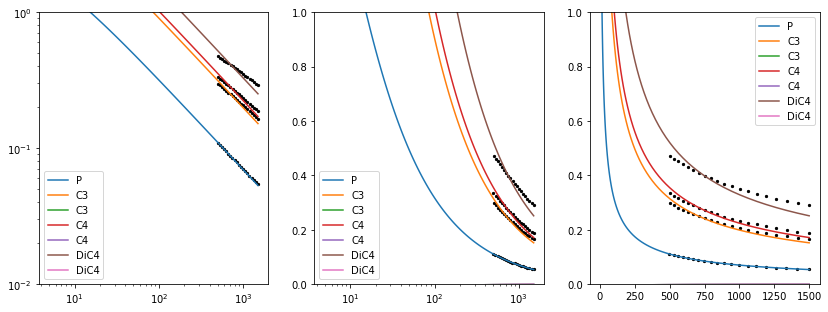

In [113]:
def custom_model(x,a):
    return a*np.power(x+3, -2/3)


fig, axx = plt.subplots(1,3, figsize = (14,5))

x = [-1]*4
real_data = [-1]*4
x[0], real_data[0] = pmodel_collection.evaluate(select = select)
x[1], real_data[1] = c3model_collection.evaluate(select = select)
x[2], real_data[2] = c4model_collection.evaluate(select = select_c4)
x[3], real_data[3] = dicmodel_collection.evaluate(select = select)

for x, data in zip(x,real_data):
    axx[0].scatter(x,data, color = "black", s = 5)
    axx[1].scatter(x,data, color = "black", s = 5)
    axx[2].scatter(x,data, color = "black", s = 5)

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(5, bounds[1], 100)

param, _  = pmodel_collection.transport_prob_model(select = select, mode = "banchi1") 
data = [custom_model(x, param) for x in sample]
axx[0].plot(sample, data, label = "P")
axx[1].plot(sample, data, label = "P")
axx[2].plot(sample, data, label = "P")

param = c3model_collection.transport_prob_model(select = select, mode = "banchi1") 
data = [custom_model(x, param) for x in sample]
axx[0].plot(sample, data, label = "C3")
axx[1].plot(sample, data, label = "C3")
axx[2].plot(sample, data, label = "C3")

param = c4model_collection.transport_prob_model(select = select_c4, mode = "banchi1") 
data = [custom_model(x, param) for x in sample]
axx[0].plot(sample, data, label = "C4")
axx[1].plot(sample, data, label = "C4")
axx[2].plot(sample, data, label = "C4")

param = dicmodel_collection.transport_prob_model(select = select, mode = "banchi1") 
data = [custom_model(x, param) for x in sample]
axx[0].plot(sample, data, label = "DiC4")
axx[1].plot(sample, data, label = "DiC4")
axx[2].plot(sample, data, label = "DiC4")

axx[0].legend()
axx[1].legend()
axx[2].legend()

# Banchi2 

######### Transpor prob model:  banchi2
a*x^-2/3:  7.282738011851029  +-  9.210989561369473e-08
b*x^-4/3:  -25.645818029660774  +-  0.0005777571290621576
######### Transpor prob model:  banchi2
a*x^-2/3:  23.82763574427354  +-  0.0015679259263059004
b*x^-4/3:  -319.768577899981  +-  9.901720449596452
######### Transpor prob model:  banchi2
a*x^-2/3:  27.410857211205915  +-  0.0029975659065394024
b*x^-4/3:  -403.89268456374856  +-  18.89767529181874
######### Transpor prob model:  banchi2
a*x^-2/3:  44.74678393244204  +-  0.03984597941808751
b*x^-4/3:  -957.5178635329911  +-  251.6341744680466


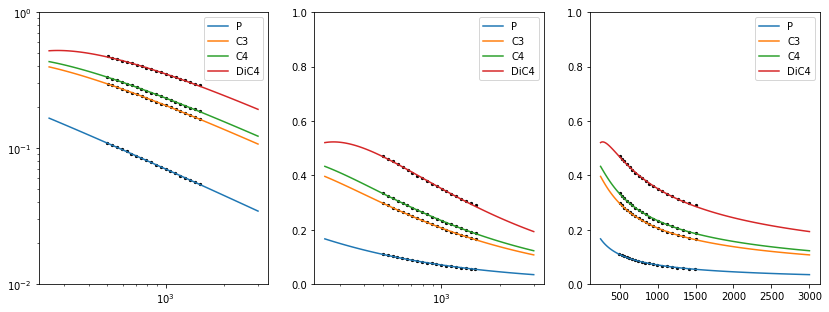

In [114]:
def custom_model(x,a,b):
    return a*np.power(x+3, -2/3)+ b*np.power(x+3, -4/3)


fig, axx = plt.subplots(1,3, figsize = (14,5))

x = [-1]*4
real_data = [-1]*4
x[0], real_data[0] = pmodel_collection.evaluate(select = select)
x[1], real_data[1] = c3model_collection.evaluate(select = select)
x[2], real_data[2] = c4model_collection.evaluate(select = select_c4)
x[3], real_data[3] = dicmodel_collection.evaluate(select = select)

for x, data in zip(x,real_data):
    axx[0].scatter(x,data, color = "black", s = 5)
    axx[1].scatter(x,data, color = "black", s = 5)
    axx[2].scatter(x,data, color = "black", s = 5)

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

axx[2].set_ylim(0,1)

sample = np.geomspace(bounds[0]/2, bounds[1]*2, 100)

param = pmodel_collection.transport_prob_model(select = select, mode = "banchi2") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "P")
axx[1].plot(sample, data, label = "P")
axx[2].plot(sample, data, label = "P")

param = c3model_collection.transport_prob_model(select = select, mode = "banchi2") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "C3")
axx[1].plot(sample, data, label = "C3")
axx[2].plot(sample, data, label = "C3")

param = c4model_collection.transport_prob_model(select = select_c4, mode = "banchi2") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "C4")
axx[1].plot(sample, data, label = "C4")
axx[2].plot(sample, data, label = "C4")

param = dicmodel_collection.transport_prob_model(select = select, mode = "banchi2") 
data = [custom_model(x, *param) for x in sample]
axx[0].plot(sample, data, label = "DiC4")
axx[1].plot(sample, data, label = "DiC4")
axx[2].plot(sample, data, label = "DiC4")

axx[0].legend()
axx[1].legend()
axx[2].legend()


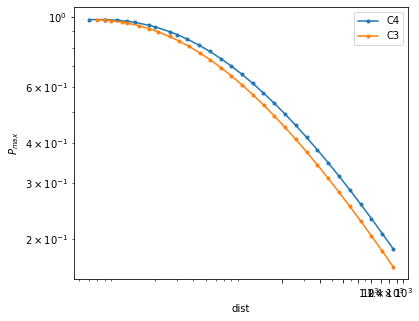

In [115]:
ax = plot_standard_progression(c4model_collection, select = global_c4, label = "C4")
ax.set_ylim(top = 1, auto =True)
ax.set_yscale("log")
ax.set_xscale("log")

plot_standard_progression(c3model_collection, select = global_select, label = "C3", ax = ax).legend()